# Click-Through Rate Prediction

Data Source: https://www.kaggle.com/datasets/swekerr/click-through-rate-prediction
Click-Through Rate is calculated as the number of clicks an ad receives divided by the number of times the ad is shown (impressions), expressed as a percentage. The CTR prediction task involves modeling the likelihood of a click based on ad characteristics, user profile data, and contextual features.

Predicting the click-through Rate (CTR) is crucial for optimizing online advertising campaigns. By accurately estimating the likelihood of a user clicking on an ad, businesses can make informed decisions about ad placement and design, ultimately maximizing their return on investment (ROI).

In [78]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Reading the dataset
import pandas as pd
import numpy as np
AdData=pd.read_csv('D:/ivy/datasets/click.csv')
print('Shape before deleting duplicate values:', AdData.shape)

# Removing duplicate rows if any
AdData=AdData.drop_duplicates()
print('Shape After deleting duplicate values:', AdData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
AdData.head(10)

Shape before deleting duplicate values: (10000, 10)
Shape After deleting duplicate values: (9785, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
5,51.30,26.0,51463.17,131.68,Focused multi-state workforce,Port Maria,Female,Cameroon,2016-05-15 13:18:34,0
6,66.08,43.0,73538.09,136.40,Optimized upward-trending productivity,Port Jeffrey,Male,Turkey,2016-04-03 21:13:46,1
7,36.08,26.0,74903.41,228.78,Programmable uniform website,East Kevinbury,Male,French Guiana,2016-03-11 06:49:10,0
8,46.14,33.0,43974.49,196.77,Customizable tangible hierarchy,Lake Annashire,Male,Vanuatu,2016-03-24 06:36:52,0
9,51.65,51.0,74535.94,188.56,Function-based incremental standardization,Edwardmouth,Female,Cameroon,2016-01-31 05:12:44,0


# Basic Data Exploration
There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [80]:
AdData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   object 
 5   City                      9785 non-null   object 
 6   Gender                    9785 non-null   object 
 7   Country                   9785 non-null   object 
 8   Timestamp                 9785 non-null   object 
 9   Clicked on Ad             9785 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 840.9+ KB


In [81]:
# Looking at the descriptive statistics of the data
AdData.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
count,9785.000000,9785.000000,9785.000000,9785.000000,9785,9785,9785,9785,9785,9785.000000
unique,NaN,NaN,NaN,NaN,559,521,2,207,567,NaN
top,NaN,NaN,NaN,NaN,Cloned explicit middleware,Hubbardmouth,Female,Australia,2016-07-03 04:11:40,NaN
freq,NaN,NaN,NaN,NaN,323,330,5268,346,244,NaN
mean,61.601379,35.839550,53948.143348,177.886144,NaN,NaN,NaN,NaN,NaN,0.488605
std,15.698216,8.538524,13360.051625,40.861875,NaN,NaN,NaN,NaN,NaN,0.499896
min,32.600000,19.000000,13996.500000,105.220000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,48.030000,29.000000,44174.250000,140.150000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,76.270000,41.000000,62669.590000,212.870000,NaN,NaN,NaN,NaN,NaN,1.000000


In [82]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
AdData.nunique()

Daily Time Spent on Site    460
Age                          39
Area Income                 524
Daily Internet Usage        505
Ad Topic Line               559
City                        521
Gender                        2
Country                     207
Timestamp                   567
Clicked on Ad                 2
dtype: int64

# Removing useless columns from the data

In [83]:
AdData=AdData.drop(['Ad Topic Line','City','Country'], axis=1)
AdData

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Male,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Male,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Female,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Female,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Female,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...
9994,41.73,28.0,39799.73,217.37,Female,2016-03-20 02:44:13,0
9995,41.73,31.0,61840.26,207.17,Male,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Male,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Female,2016-01-05 11:53:17,0


Defining the problem statement:
Create a Predictive model which can tell if a person will click on the advertsement or not
Target Variable: Clicked on Ad

Predictors: Daily Time Spent on Site, Age, Area Income, Gender, Timestamp etc.

Clicked on Ad=0 The person clicked on the addvertsiment 
Clicked on Ad=1 The person does not click on the addvertsiment 

Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='Clicked on Ad'>

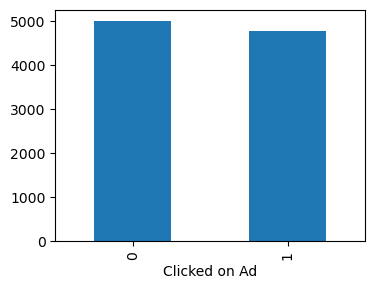

In [84]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=AdData.groupby('Clicked on Ad').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [ ]:
### Extracting the month and hour data from Timestamp to understand the pattern regrading the month and hour when a person clicked or not. 

In [85]:
from datetime import datetime
AdData['Timestamp']=pd.to_datetime(AdData['Timestamp'])
AdData['Month']=AdData['Timestamp'].dt.month
AdData['Hour']=AdData['Timestamp'].dt.hour


In [86]:
AdData['Month']
AdData['Hour']
AdData
AdData.nunique()
AdData=AdData.drop('Timestamp', axis=1)


In [87]:
AdData

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour
0,62.26,32.0,69481.85,172.83,Male,0,6,21
1,41.73,31.0,61840.26,207.17,Male,0,1,17
2,44.40,30.0,57877.15,172.83,Female,0,6,10
3,59.88,28.0,56180.93,207.17,Female,0,6,14
4,49.21,30.0,54324.73,201.58,Female,1,7,10
...,...,...,...,...,...,...,...,...
9994,41.73,28.0,39799.73,217.37,Female,0,3,2
9995,41.73,31.0,61840.26,207.17,Male,1,1,3
9996,41.73,28.0,51501.38,120.49,Male,0,5,12
9997,55.60,39.0,38067.08,124.44,Female,0,1,11


# Visual Exploratory Data Analysis
Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 'Gender', 'Month'

We use bar charts to see how the data is distributed for these categorical columns.

In [88]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        AdData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

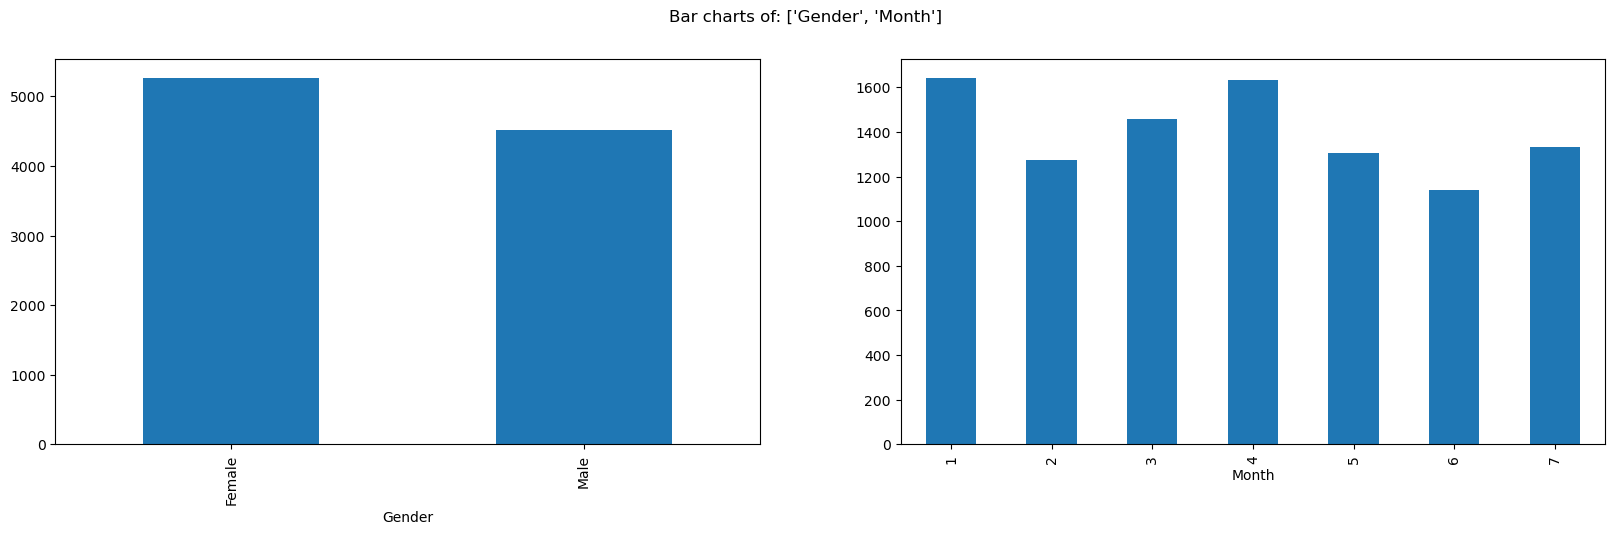

In [89]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=AdData, colsToPlot=['Gender', 'Month'])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

Selected Categorical Variables: All the categorical variables are selected for further analysis.

'Gender', 'Month'

# Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables Power,Engine, Price

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

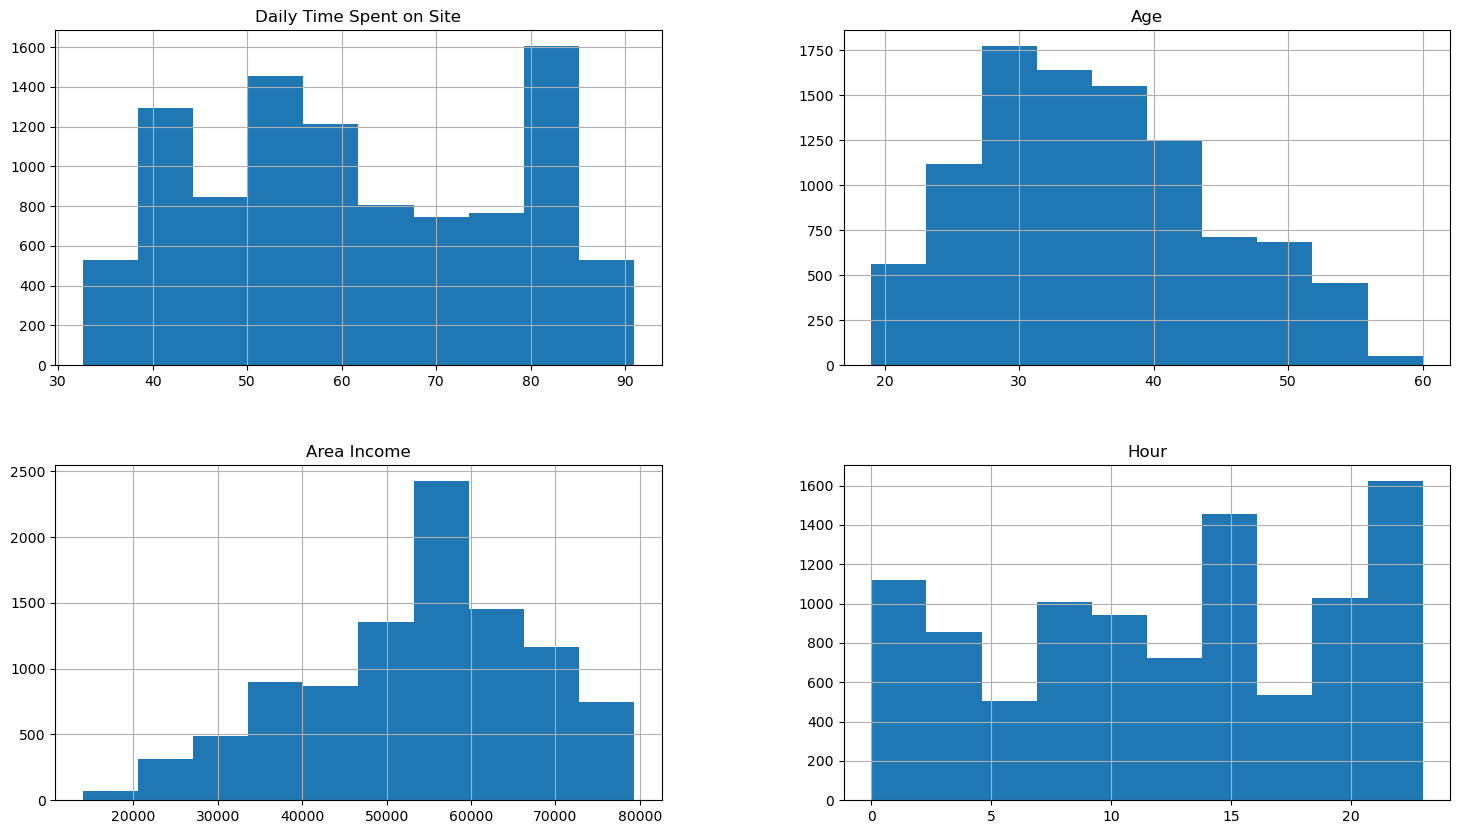

In [90]:
# Plotting histograms of multiple columns together
AdData.hist(['Daily Time Spent on Site', 'Age', 'Area Income','Hour'], figsize=(18,10))

Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. 

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

Age Income: Selected. The distribution is good.
Daily time spent: Selected. The distribution is good. 
Age:Selected. The distribution is good.
Hour:Selected. The distribution is good.

### No outlier Treatment is needed in this data

Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

Visual exploration of relationship between variables
Continuous Vs Continuous ---- Scatter Plot
Categorical Vs Continuous---- Box Plot
Categorical Vs Categorical---- Grouped Bar Plots
Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square test
In this case study the Target variable is categorical, hence below two scenarios will be present

Categorical Target Variable Vs Continuous Predictor
Categorical Target Variable Vs Categorical Predictor

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Clicked on Ad               0
Month                       0
Hour                        0
dtype: int64


<Axes: >

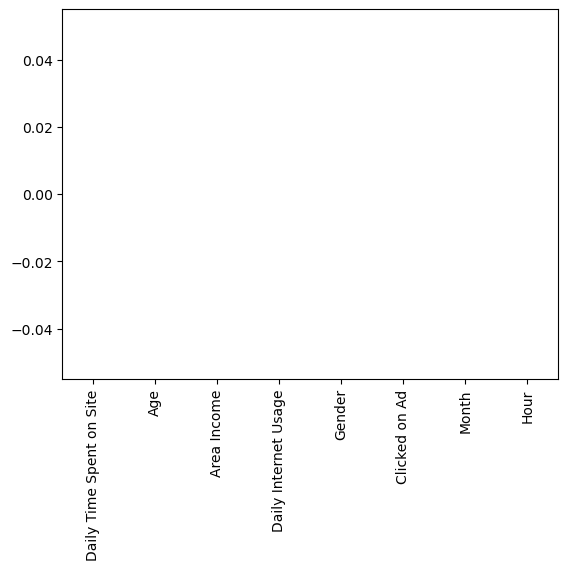

In [91]:
# Finding how many missing values are there for each column
print(AdData.isnull().sum())
AdData.isnull().sum().plot(kind='bar') 

Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

### Missing Value treatment is not needed here

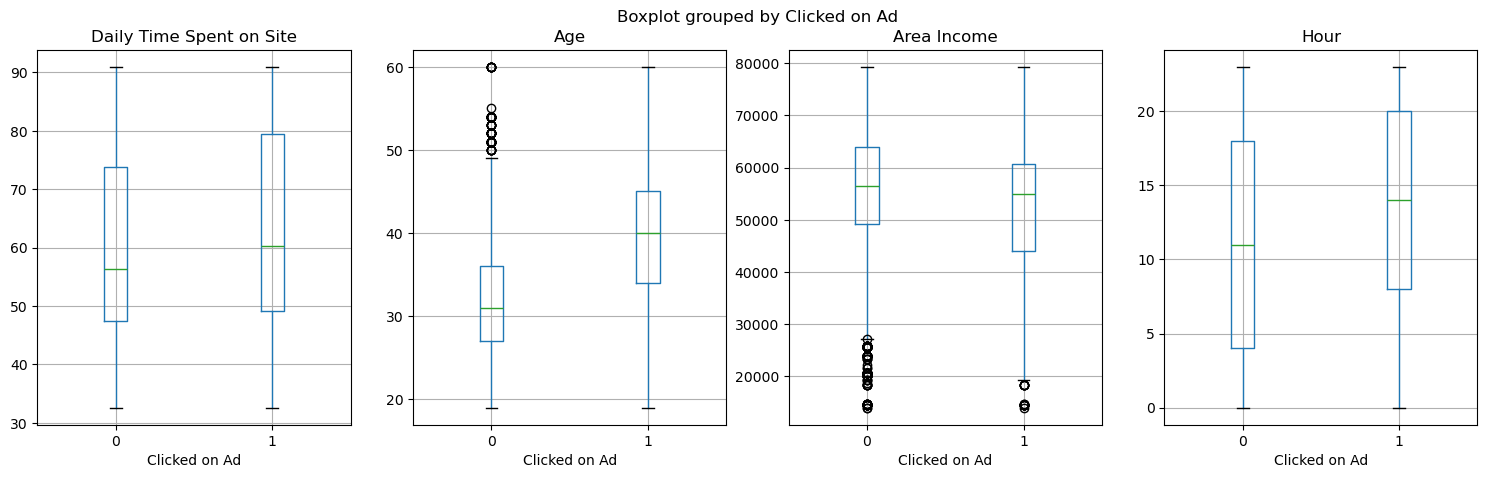

In [92]:
# Box plots for Categorical Target Variable "Clicked on Ad" and continuous predictors
ContinuousColsList=['Daily Time Spent on Site', 'Age', 'Area Income','Hour']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked on Ad"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    AdData.boxplot(column=PredictorCol, by='Clicked on Ad', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

For example, we look at the first chart "Daily Time spent on site" Vs "Clicked on Ad". The boxes are not in the same line! It means that people who have Clicked and those who did not click have different kind of Daily Time spent on site. Hence, I can distinguish between Clicked on Ad or not based on the their Daily Time spent on site. So this column is  correlated with the Clicked on Ad.


We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [93]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [94]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Daily Time Spent on Site', 'Age', 'Area Income','Hour']
FunctionAnova(inpData=AdData, TargetVariable='Clicked on Ad', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Daily Time Spent on Site is correlated with Clicked on Ad | P-Value: 6.512417897704822e-18
Age is correlated with Clicked on Ad | P-Value: 0.0
Area Income is correlated with Clicked on Ad | P-Value: 2.2419290679012107e-10
Hour is correlated with Clicked on Ad | P-Value: 2.124457480201686e-37


['Daily Time Spent on Site', 'Age', 'Area Income', 'Hour']

The results of ANOVA confirm our visual analysis using box plots above.

Final selected Continuous columns:

'Daily Time Spent on Site', 'Age', 'Area Income', 'Hour'

Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

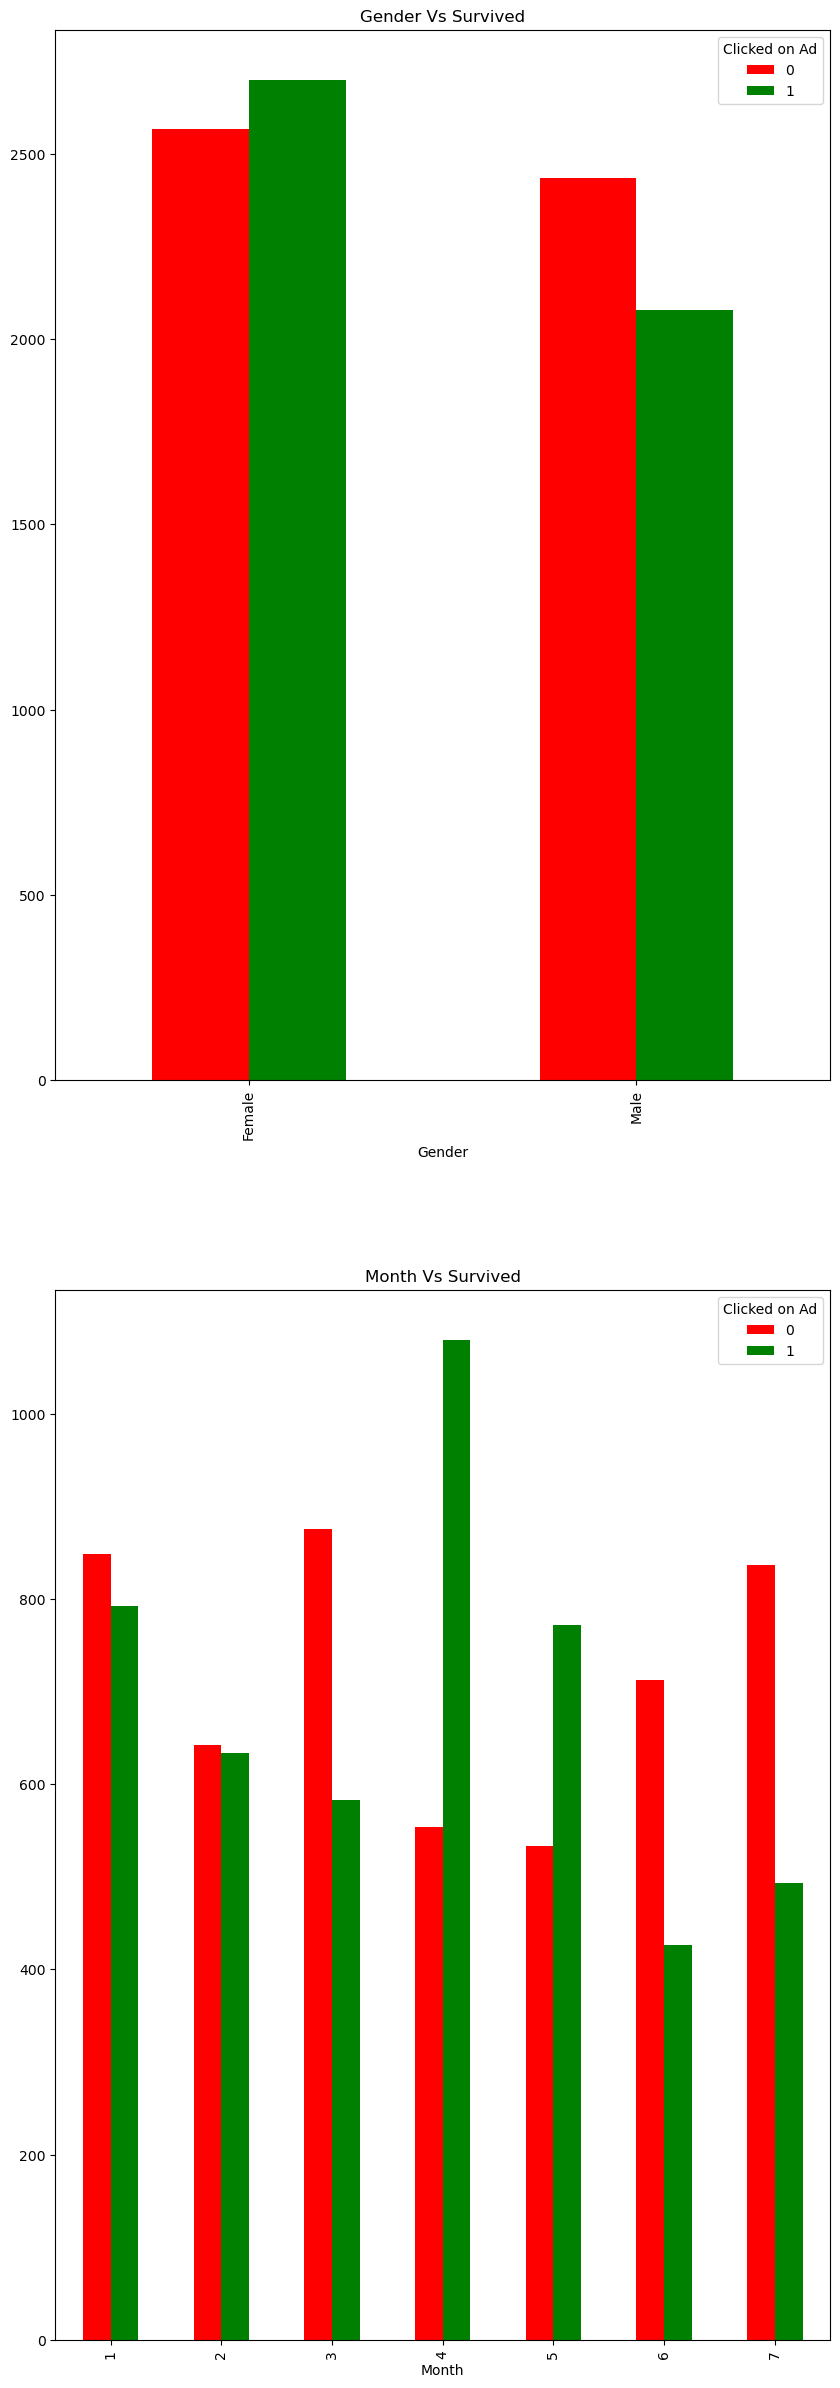

In [95]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Month']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=AdData[CategoricalCol], columns=AdData['Clicked on Ad'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Survived')

Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

If we look at the Gender vs Clicked on Add chart. The bars are different for each Gender. Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

Assumption(H0): The two columns are NOT related to each other
Result of Chi-Sq Test: The Probability of H0 being True

In [96]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [97]:
CategoricalVariables=['Gender', 'Month']

# Calling the function
FunctionChisq(inpData=AdData, 
              TargetVariable='Clicked on Ad',
              CategoricalVariablesList= CategoricalVariables)

Gender is correlated with Clicked on Ad | P-Value: 2.852766136578681e-07
Month is correlated with Clicked on Ad | P-Value: 8.3907313320513e-90


['Gender', 'Month']

In [ ]:
### Gender and Month both are selected

Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [98]:
SelectedColumns=['Gender', 'Month', 'Daily Time Spent on Site', 'Age', 'Area Income','Hour']

# Selecting final columns
DataForML=AdData[SelectedColumns]
DataForML.head()

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour
0,Male,6,62.26,32.0,69481.85,21
1,Male,1,41.73,31.0,61840.26,17
2,Female,6,44.40,30.0,57877.15,10
3,Female,6,59.88,28.0,56180.93,14
4,Female,7,49.21,30.0,54324.73,10


In [64]:
import os
os.getcwd()

'C:\\Users\\Windows 10'

In [99]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [100]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()
DataForML.nunique()

Gender                        2
Month                         7
Daily Time Spent on Site    460
Age                          39
Area Income                 524
Hour                         24
dtype: int64

In [101]:
DataForML

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour
0,Male,6,62.26,32.0,69481.85,21
1,Male,1,41.73,31.0,61840.26,17
2,Female,6,44.40,30.0,57877.15,10
3,Female,6,59.88,28.0,56180.93,14
4,Female,7,49.21,30.0,54324.73,10
...,...,...,...,...,...,...
9994,Female,3,41.73,28.0,39799.73,2
9995,Male,1,41.73,31.0,61840.26,3
9996,Male,5,41.73,28.0,51501.38,12
9997,Female,1,55.60,39.0,38067.08,11


# Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
In this data there is no Ordinal categorical variable which is in string format.

Converting the binary nominal variable to numeric using 1/0 mapping
There is no binary nominal variable in string format to be converted

## Converting the binary nominal variable to numeric using 1/0 mapping

In [104]:
# Converting the binary nominal variable sex to numeric
DataForML['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

In [105]:
DataForML

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour
0,1,6,62.26,32.0,69481.85,21
1,1,1,41.73,31.0,61840.26,17
2,0,6,44.40,30.0,57877.15,10
3,0,6,59.88,28.0,56180.93,14
4,0,7,49.21,30.0,54324.73,10
...,...,...,...,...,...,...
9994,0,3,41.73,28.0,39799.73,2
9995,1,1,41.73,31.0,61840.26,3
9996,1,5,41.73,28.0,51501.38,12
9997,0,1,55.60,39.0,38067.08,11


In [106]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)
# Adding Target Variable to the data
DataForML_Numeric['Clicked on Ad']=AdData['Clicked on Ad']

# Printing sample rows
DataForML_Numeric.head()


,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour,Clicked on Ad
0,1,6,62.26,32.0,69481.85,21,0
1,1,1,41.73,31.0,61840.26,17,0
2,0,6,44.40,30.0,57877.15,10,0
3,0,6,59.88,28.0,56180.93,14,0
4,0,7,49.21,30.0,54324.73,10,1


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [107]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Gender', 'Month', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Hour', 'Clicked on Ad'],
      dtype='object')

In [109]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked on Ad'
Predictors=['Gender', 'Month', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Hour']


X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6849, 6)
(6849,)
(2936, 6)
(2936,)


In [110]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[    0.  ,     5.  ,    49.21,    33.  , 75769.82,    21.  ],
       [    1.  ,     2.  ,    61.22,    31.  , 59886.58,     9.  ],
       [    0.  ,     6.  ,    55.6 ,    24.  , 52252.91,     6.  ],
       [    0.  ,     1.  ,    88.12,    38.  , 51920.49,    19.  ],
       [    1.  ,     4.  ,    82.07,    43.  , 73538.09,    21.  ],
       [    0.  ,     7.  ,    65.65,    27.  , 55993.68,     4.  ],
       [    0.  ,     2.  ,    59.59,    22.  , 48335.2 ,     6.  ],
       [    1.  ,     6.  ,    51.87,    19.  , 33951.63,    21.  ],
       [    0.  ,     2.  ,    59.22,    28.  , 53058.91,    20.  ],
       [    0.  ,     6.  ,    71.84,    31.  , 56180.93,    14.  ]])

In [111]:
y_train[0:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.



In [112]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [114]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6849, 6)
(6849,)
(2936, 6)
(2936,)


In [115]:
X_train[0:10]


array([[0.        , 0.66666667, 0.28456399, 0.34146341, 0.94547387,
        0.91304348],
       [1.        , 0.16666667, 0.49032037, 0.29268293, 0.70237234,
        0.39130435],
       [0.        , 0.83333333, 0.39403803, 0.12195122, 0.58553492,
        0.26086957],
       [0.        , 0.        , 0.95117355, 0.46341463, 0.58044705,
        0.82608696],
       [1.        , 0.5       , 0.84752441, 0.58536585, 0.91131604,
        0.91304348],
       [0.        , 1.        , 0.56621552, 0.19512195, 0.64278942,
        0.17391304],
       [0.        , 0.16666667, 0.46239507, 0.07317073, 0.52557226,
        0.26086957],
       [1.        , 0.83333333, 0.33013534, 0.        , 0.30542399,
        0.91304348],
       [0.        , 0.16666667, 0.45605619, 0.2195122 , 0.59787118,
        0.86956522],
       [0.        , 0.83333333, 0.67226315, 0.29268293, 0.64565538,
        0.60869565]])

In [116]:
y_train[0:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# LOGISTIC REGRESSION

In [117]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1517
           1       0.71      0.68      0.69      1419

    accuracy                           0.71      2936
   macro avg       0.71      0.71      0.71      2936
weighted avg       0.71      0.71      0.71      2936

[[1132  385]
 [ 461  958]]
Accuracy of the model on Testing Sample Data: 0.71

Accuracy values for 10-fold Cross Validation:
 [0.71451605 0.71125161 0.73310649 0.72610311 0.70992023 0.7152815
 0.73589115 0.7115333  0.73285298 0.71459627]

Final Average Accuracy of the model: 0.72


## Accuracy of the Multiple Linear Regression Model is 72%

# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1517
           1       0.66      0.75      0.70      1419

    accuracy                           0.69      2936
   macro avg       0.69      0.69      0.69      2936
weighted avg       0.70      0.69      0.69      2936

[[ 973  544]
 [ 361 1058]]
Accuracy of the model on Testing Sample Data: 0.69

Accuracy values for 10-fold Cross Validation:
 [0.70293188 0.71301136 0.70236524 0.70369035 0.70972863 0.71882008
 0.70630487 0.70686833 0.73417802 0.72903234]

Final Average Accuracy of the model: 0.71


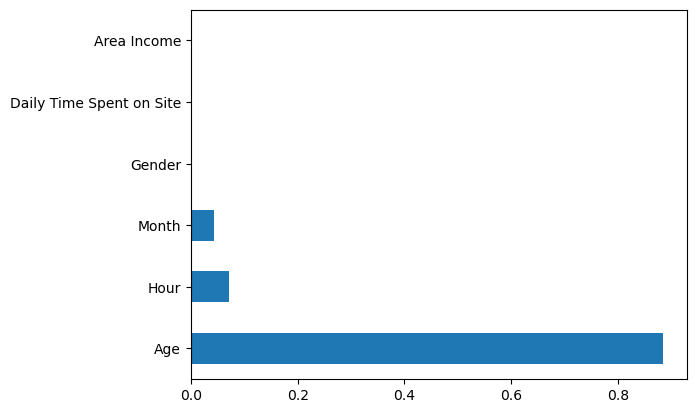

In [118]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
Accuracy is higher in Logistic Regression model(72%) than Decission Tree model(71%). So we will take Linear Logistic Regression model. Morever, Age, Hour and Month are the top three click through rate predictor.

### Individual predictions

In [119]:
DataForML.head()

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour
0,1,6,62.26,32.0,69481.85,21
1,1,1,41.73,31.0,61840.26,17
2,0,6,44.40,30.0,57877.15,10
3,0,6,59.88,28.0,56180.93,14
4,0,7,49.21,30.0,54324.73,10


In [120]:
Predictors

['Gender', 'Month', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Hour']

In [122]:
# Creating some new data rows
NewData=pd.DataFrame(data=[[1,5,67,31.0,58312.05,19],
                           [0,3,56,31.0,68312.85,16]]
                           , columns=Predictors)
NewData

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour
0,1,5,67,31.0,58312.05,19
1,0,3,56,31.0,68312.85,16


In [123]:
new_X=NewData.values
new_X

array([[    1.  ,     5.  ,    67.  ,    31.  , 58312.05,    19.  ],
       [    0.  ,     3.  ,    56.  ,    31.  , 68312.85,    16.  ]])

In [124]:
# Making sure the new data is also Normalized using the same normalization PredictorScalerFit
new_X=PredictorScalerFit.transform(new_X)
new_X

array([[1.        , 0.66666667, 0.58934384, 0.29268293, 0.67827331,
        0.82608696],
       [0.        , 0.33333333, 0.40089087, 0.29268293, 0.83134093,
        0.69565217]])

In [125]:
DTree.predict(new_X)

array([0, 0], dtype=int64)

In [126]:
def GenerateClickPred(inpData):
    new_X=inpData.values
    # Making sure the new data is also Normalized using the same normalization PredictorScalerFit
    new_X=PredictorScalerFit.transform(new_X)
    pred=DTree.predict(new_X)
    inpData['Prediction']=pred
    return(inpData)

In [127]:
# Calling the function with new input
PredData=GenerateClickPred(inpData=NewData)
PredData

,Gender,Month,Daily Time Spent on Site,Age,Area Income,Hour,Prediction
0,1,5,67,31.0,58312.05,19,0
1,0,3,56,31.0,68312.85,16,0


In [128]:
# Saving the prediction data as a file
PredData.to_csv('PredData.csv')

In [129]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:/anac3/Library/bin'

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Age <= 0.524\nentropy = 1.0\nsamples = 6849\nvalue = [3487, 3362]\nclass = 0"] ;
1 [label="Age <= 0.305\nentropy = 0.936\nsamples = 4931\nvalue = [3196, 1735]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Hour <= 0.587\nentropy = 0.804\nsamples = 2402\nvalue = [1813, 589]\nclass = 0"] ;
1 -> 2 ;
3 [label="entropy = 0.723\nsamples = 1301\nvalue = [1040, 261]\nclass = 0"] ;
2 -> 3 ;
4 [label="entropy = 0.879\nsamples = 1101\nvalue = [773, 328]\nclass = 0"] ;
2 -> 4 ;
5 [label="Hour <= 0.239\nentropy = 0.994\nsamples = 2529\nvalue = [1383, 1146]\nclass = 0"] ;
1 -> 5 ;
6 [label="entropy = 0.861\nsamples = 676\nvalue = [484, 192]\nclass = 0"] ;
5 -> 6 ;
7 [label="entropy = 0.999\nsamples = 1853\nvalue = [899, 954]\nclass = 1"] ;
5 -> 7 ;
8 [label="Month <= 0.417\nentropy = 0.614\nsamples = 1918\nvalue = [291, 1627]\nclass = 1"] ;
0 -> 8 [labeldistance=2.5

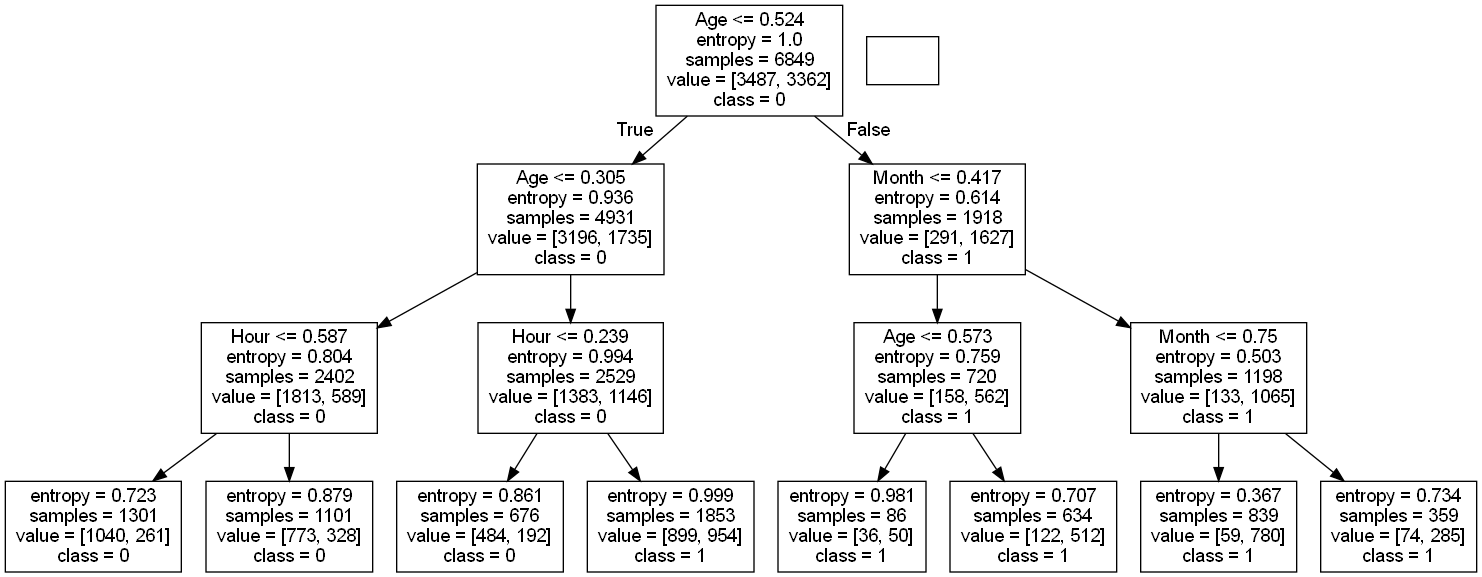

In [130]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTree, out_file=None, 
                                feature_names=Predictors, class_names=['0','1'])
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in